In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import data
diabetes = pd.read_csv(r'C:\Users\Rajashri\Desktop\Projects\Diabetes Prediction\diabetes.csv')

In [3]:
print(diabetes.shape)
diabetes.head(5)

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Feature information
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# Let's examine the distribution of the 'target' variable
diabetes['Outcome'].value_counts()*100 / len(diabetes)

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

### Data Visualization

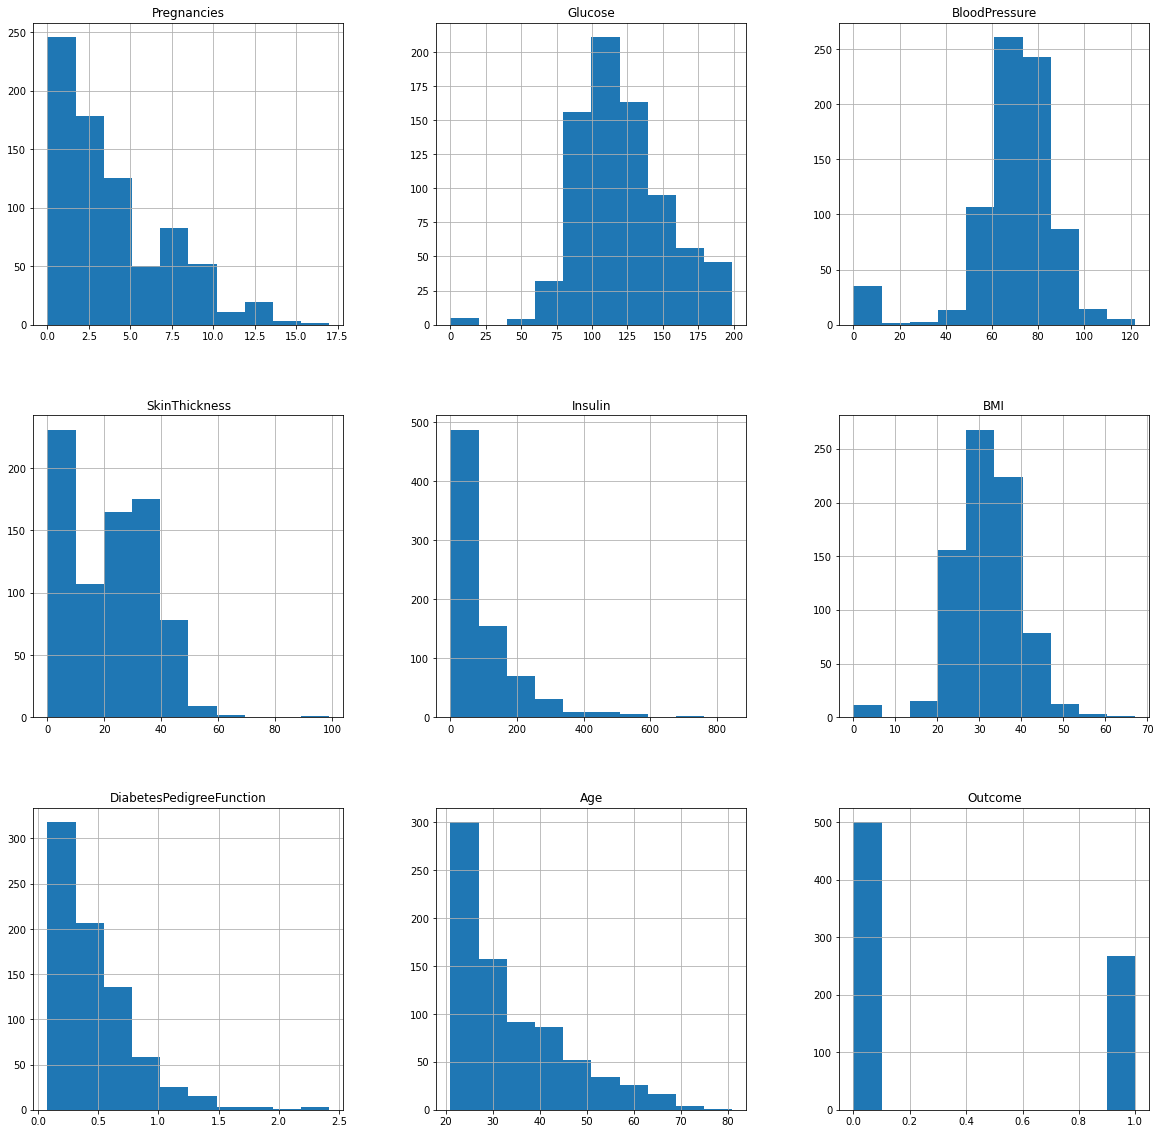

In [7]:
diabetes.hist(figsize = (20,20))
plt.show()

0    500
1    268
Name: Outcome, dtype: int64


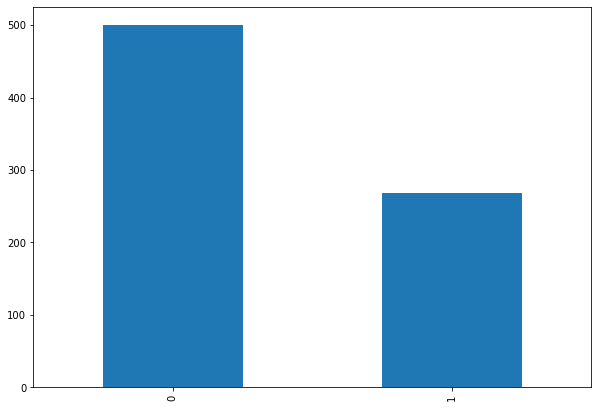

In [8]:
# Let’s check how well our outcome column is balanced
print(diabetes.Outcome.value_counts())

plt.figure(figsize=(10,7))
diabetes.Outcome.value_counts().plot(kind="bar")
plt.show()

C:\Users\Rajashri\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Rajashri\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Rajashri\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an

<AxesSubplot:xlabel='BMI', ylabel='Density'>

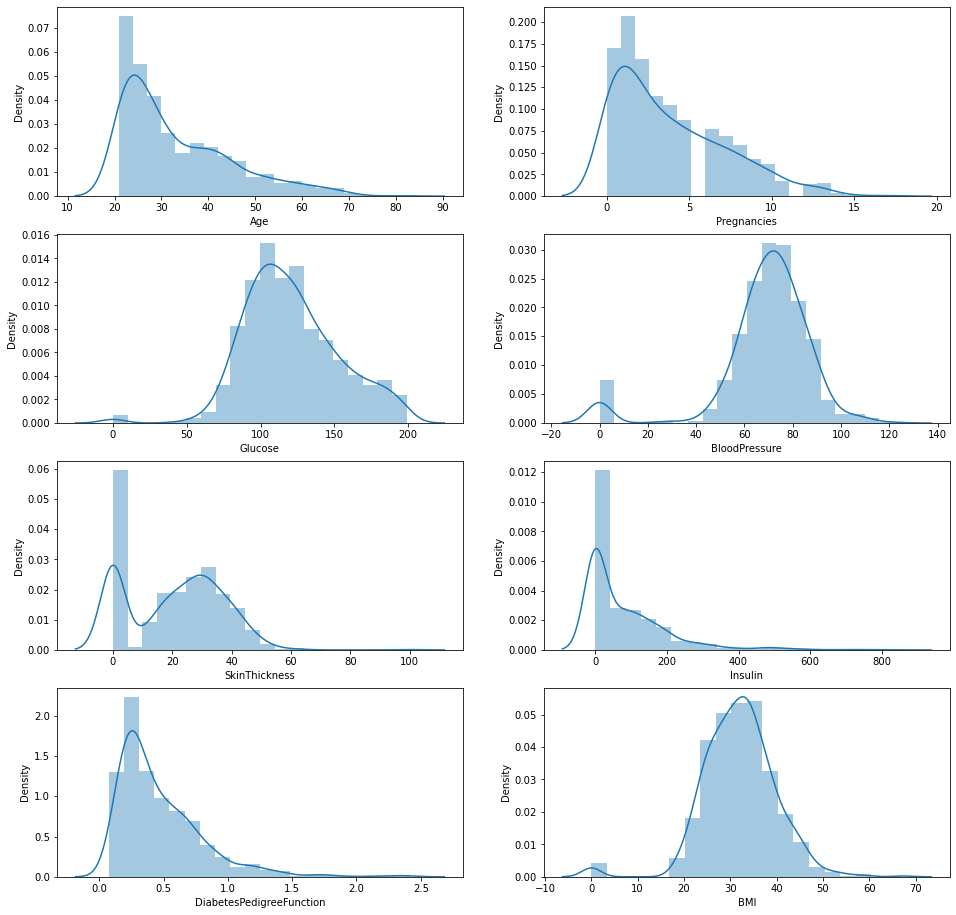

In [9]:
# Density graphs of all the attributes
fig, ax = plt.subplots(4,2, figsize=(16,16))

sns.distplot(diabetes.Age, bins = 20, ax=ax[0,0]) 
sns.distplot(diabetes.Pregnancies, bins = 20, ax=ax[0,1]) 
sns.distplot(diabetes.Glucose, bins = 20, ax=ax[1,0]) 
sns.distplot(diabetes.BloodPressure, bins = 20, ax=ax[1,1]) 
sns.distplot(diabetes.SkinThickness, bins = 20, ax=ax[2,0])
sns.distplot(diabetes.Insulin, bins = 20, ax=ax[2,1])
sns.distplot(diabetes.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0]) 
sns.distplot(diabetes.BMI, bins = 20, ax=ax[3,1]) 

In [10]:
diabetes.groupby("Outcome").agg({"Pregnancies":"mean"})

,Pregnancies
Outcome,
0,3.298000
1,4.865672


In [11]:
diabetes.groupby("Outcome").agg({"Age":"mean"})

,Age
Outcome,
0,31.190000
1,37.067164


In [12]:
diabetes.groupby("Outcome").agg({"Insulin": "mean"})

,Insulin
Outcome,
0,68.792000
1,100.335821


In [13]:
diabetes.groupby("Outcome").agg({"Glucose": "mean"})

,Glucose
Outcome,
0,109.980000
1,141.257463


In [14]:
diabetes.groupby("Outcome").agg({"BMI": "mean"})

,BMI
Outcome,
0,30.304200
1,35.142537


#### Correlation between all the features  

In [15]:
# If (correlation > 0) -> positive correlation
# If (Correlation = 0) -> no correlation
# If (Correlation < 0) -> negative correlation
diabetes.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


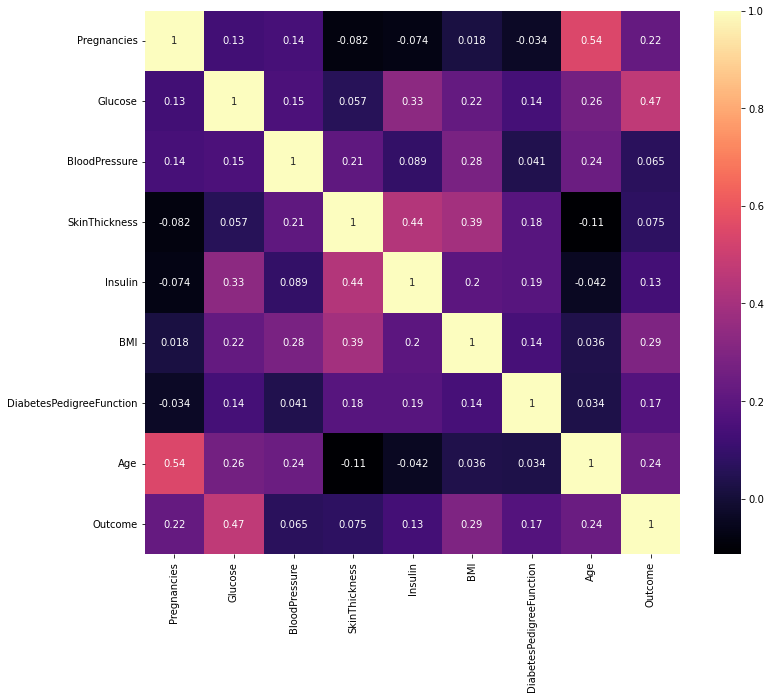

In [16]:
plt.figure(figsize=(12,10))
sns.heatmap(diabetes.corr(), annot=True, cmap = "magma")
plt.show()

### Data Preprocessing

In [17]:
diabetes.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [18]:
# Some features contain 0, which doesn't make sense in a few columns
# Clearly, 0 indicates missing value so we replace 0 by NaN
diabetes[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = diabetes[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)

In [19]:
diabetes.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [20]:
# Let's now check where our dataset has null values
diabetes.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [21]:
# The missing values will be filled with the median values of each variable
diabetes['Glucose'] = diabetes['Glucose'].fillna(diabetes['Glucose'].median())
diabetes['BloodPressure'] = diabetes['BloodPressure'].fillna(diabetes['BloodPressure'].median())
diabetes['SkinThickness'] = diabetes['SkinThickness'].fillna(diabetes['SkinThickness'].median())
diabetes['Insulin'] = diabetes['Insulin'].fillna(diabetes['Insulin'].median())
diabetes['BMI'] = diabetes['BMI'].fillna(diabetes['BMI'].median())

In [22]:
# Let's check if our dataset has any more null values now
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [23]:
diabetes.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


### Feature Engineering

In [24]:
# According to BMI, some ranges can be determined and categorical variables can then be assigned
NewBMI = pd.Series(["Underweight", "Normal", "Overweight", "Obesity-I", "Obesity-II", "Obesity-III"], dtype = "category")
diabetes["NewBMI"] = NewBMI

diabetes.loc[diabetes["BMI"] < 18.5, "NewBMI"] = NewBMI[0]
diabetes.loc[(diabetes["BMI"] > 18.5) & (diabetes["BMI"] <= 24.9), "NewBMI"] = NewBMI[1]
diabetes.loc[(diabetes["BMI"] > 24.9) & (diabetes["BMI"] <= 29.9), "NewBMI"] = NewBMI[2]
diabetes.loc[(diabetes["BMI"] > 29.9) & (diabetes["BMI"] <= 34.9), "NewBMI"] = NewBMI[3]
diabetes.loc[(diabetes["BMI"] > 34.9) & (diabetes["BMI"] <= 39.9), "NewBMI"] = NewBMI[4]
diabetes.loc[diabetes["BMI"] > 39.9 , "NewBMI"] = NewBMI[5]

In [25]:
diabetes.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1,Obesity-I
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0,Overweight
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1,Normal
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity-III


In [26]:
# According to Glucose value, some ranges can be determined and categorical variables can then be assigned
NewGlucose = pd.Series(["Normal", "Prediabetes", "High"], dtype = "category")
diabetes["NewGlucose"] = NewGlucose

diabetes.loc[diabetes["Glucose"] < 140, "NewGlucose"] = NewGlucose[0]
diabetes.loc[(diabetes["Glucose"] >= 140) & (diabetes["Glucose"] <= 199), "NewGlucose"] = NewGlucose[1]
diabetes.loc[diabetes["Glucose"] > 199 ,"NewGlucose"] = NewGlucose[2]

In [27]:
diabetes.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewGlucose
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1,Obesity-I,Prediabetes
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0,Overweight,Normal
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1,Normal,Prediabetes
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,Normal
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity-III,Normal


In [28]:
# According to Insulin value, some ranges can be determined and categorical variables can then be assigned
def set_insulin(row):
    if row["Insulin"] >= 16 and row["Insulin"] <= 166:
        return "Normal"
    else:
        return "Abnormal"

diabetes = diabetes.assign(NewInsulin = diabetes.apply(set_insulin, axis=1))

In [29]:
diabetes.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewGlucose,NewInsulin
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1,Obesity-I,Prediabetes,Normal
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0,Overweight,Normal,Normal
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1,Normal,Prediabetes,Normal
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,Normal,Normal
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity-III,Normal,Abnormal


#### One Hot Encoding

In [30]:
# By making One Hot Encoding transformation, categorical variables were converted into numerical values
# One Hot Encoding -> new column for each category
# To avoid dummy-variable trap, we should have 1 less dummies column
diabetes = pd.get_dummies(diabetes, columns =["NewBMI", "NewInsulin", "NewGlucose"], drop_first = True)

In [31]:
diabetes.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI_Obesity-I,NewBMI_Obesity-II,NewBMI_Obesity-III,NewBMI_Overweight,NewBMI_Underweight,NewInsulin_Normal,NewGlucose_Normal,NewGlucose_Prediabetes
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1,1,0,0,0,0,1,0,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0,0,0,0,1,0,1,1,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1,0,0,0,0,0,1,0,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,0,0,0,1,0,1,1,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,0,0,1,0,0,0,1,0


In [32]:
# Re-ordering the columns
diabetes = diabetes.reindex(columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
                                     'DiabetesPedigreeFunction', 'Age', 'NewInsulin_Normal', 'NewGlucose_Normal',
                                     'NewGlucose_Prediabetes', 'NewBMI_Obesity-I', 'NewBMI_Obesity-II', 'NewBMI_Obesity-III',
                                     'NewBMI_Overweight', 'NewBMI_Underweight', 'Outcome'])
diabetes.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,NewInsulin_Normal,NewGlucose_Normal,NewGlucose_Prediabetes,NewBMI_Obesity-I,NewBMI_Obesity-II,NewBMI_Obesity-III,NewBMI_Overweight,NewBMI_Underweight,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1,0,1,1,0,0,0,0,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,1,1,0,0,0,0,1,0,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1,0,1,0,0,0,0,0,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,1,1,0,0,0,0,1,0,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,0,1,0,0,0,1,0,0,1


### Building our model

In [33]:
# Define the 'features' and 'labels'
X = diabetes.drop('Outcome', axis='columns')
y = diabetes['Outcome']

In [60]:
# Define train : test dataset in 70 : 30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [61]:
# Scale down i/p features for better results
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Random Forest Model

In [62]:
# Import Random Forest model
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)

# Train the model on the training set
rfc.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rfc.predict(X_test)

In [63]:
# evaluating our RFC model
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[127  19]
 [ 36  49]]
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       146
           1       0.72      0.58      0.64        85

    accuracy                           0.76       231
   macro avg       0.75      0.72      0.73       231
weighted avg       0.76      0.76      0.76       231



In [64]:
from sklearn.metrics import accuracy_score

print("Accuracy Score(in %): ", (accuracy_score(y_test, y_pred))*100)

Accuracy Score(in %):  76.19047619047619


### Logistic Regression Model

In [65]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()

# Train the model on the training set
log_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred1 = log_model.predict(X_test)

In [66]:
# evaluating our SVC model
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))

[[129  17]
 [ 34  51]]
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       146
           1       0.75      0.60      0.67        85

    accuracy                           0.78       231
   macro avg       0.77      0.74      0.75       231
weighted avg       0.78      0.78      0.77       231



In [67]:
from sklearn.metrics import accuracy_score

print("Accuracy Score(in %): ", (accuracy_score(y_test, y_pred1))*100)

Accuracy Score(in %):  77.92207792207793


### Feature Importance

In [68]:
# get importance
importance = rfc.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.07350
Feature: 1, Score: 0.17661
Feature: 2, Score: 0.08071
Feature: 3, Score: 0.06753
Feature: 4, Score: 0.06727
Feature: 5, Score: 0.15067
Feature: 6, Score: 0.11838
Feature: 7, Score: 0.11509
Feature: 8, Score: 0.01182
Feature: 9, Score: 0.04212
Feature: 10, Score: 0.04462
Feature: 11, Score: 0.01432
Feature: 12, Score: 0.01014
Feature: 13, Score: 0.01334
Feature: 14, Score: 0.01382
Feature: 15, Score: 0.00005


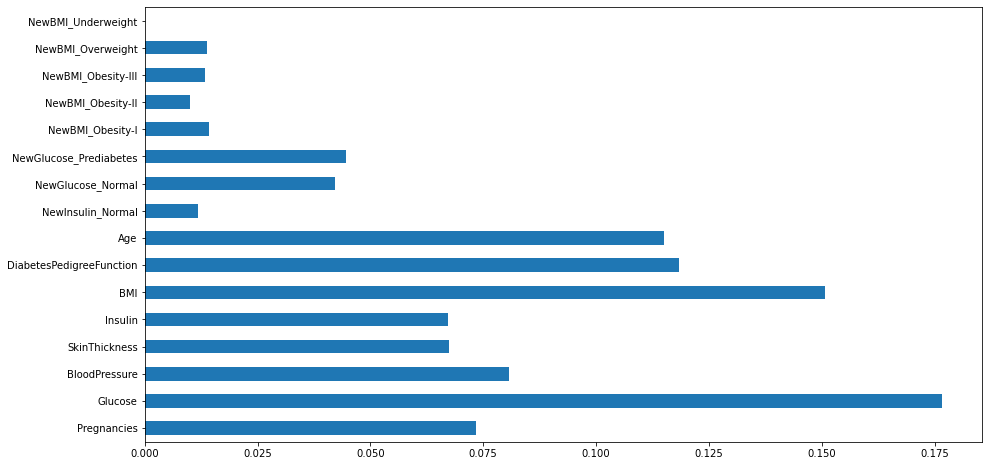

In [69]:
# Plot feature importance
plt.figure(figsize=(15,8))
pd.Series(importance, index=X.columns).plot(kind='barh')
plt.show()

### Saving our model

In [70]:
import pickle

# First, we will use the dump() function to save the model using pickle
saved_model = pickle.dumps(rfc)

# Then, we will load that saved model
rfc_from_pickle = pickle.loads(saved_model)

# Finally, after loading that model we will use this to make predictions
rfc_from_pickle.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

### Making predictions 

In [71]:
diabetes.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,NewInsulin_Normal,NewGlucose_Normal,NewGlucose_Prediabetes,NewBMI_Obesity-I,NewBMI_Obesity-II,NewBMI_Obesity-III,NewBMI_Overweight,NewBMI_Underweight,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1,0,1,1,0,0,0,0,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,1,1,0,0,0,0,1,0,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1,0,1,0,0,0,0,0,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,1,1,0,0,0,0,1,0,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,0,1,0,0,0,1,0,0,1


In [72]:
rfc.predict([[6, 148.0, 72.0, 35.0, 125.0, 33.6, 0.627, 50, 1, 0, 1, 1, 0, 0, 0, 0]])

array([1], dtype=int64)